In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

column_names = [
    "timeStamp", "elapsed", "label", "responseCode", "responseMessage", 
    "threadName", "dataType", "success", "failureMessage", "bytes", 
    "sentBytes", "grpThreads", "allThreads", "URL", "Latency", 
    "IdleTime", "Connect"
]

# Veri yükleme (sütunları yüklerken yukarıdaki isimleri kullandık)
data = pd.read_csv('Kozmetik500.csv', names=column_names)

# Özellik ve hedef değişken seçimi
features = data[['grpThreads', 'allThreads', 'Latency', 'bytes', 'sentBytes', 'success']]
target = data['elapsed']




In [2]:
# Check unique values in the 'success' column
print(features['success'].unique())


['success' 'true' 'false' nan]


In [3]:
# Drop rows with any unexpected values in 'success'
features = features[features['success'].isin(['true', 'false'])]

# Now perform the replacement and conversion
features['success'] = features['success'].replace({'true': 1, 'false': 0}).astype(int)


In [4]:
# Satır sayısını eşitlemek için ortak indeksleri kullanarak yeniden ayarlama
features = features.iloc[:min(len(features), len(target))]
target = target.iloc[:min(len(features), len(target))]


In [5]:
print(target.dtypes)
print(features.dtypes)


# Eğer metin içeren sütunlar varsa, bu sütunları sayısal formatta kodlayın veya çıkarın
# Örnek: metin verilerini sayısal hale getirme
from sklearn.preprocessing import LabelEncoder

# Sadece metin sütunlarına LabelEncoder uygulayın
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])

# Aynı işlemi target için de yapın (eğer metin içeriyorsa)
if target.dtypes == 'object':
    target = le.fit_transform(target)

object
grpThreads    object
allThreads    object
Latency       object
bytes         object
sentBytes     object
success        int32
dtype: object


In [6]:
# Veriyi eğitim ve test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Modeli tanımlama ve eğitme
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 308.3544462305481


In [7]:
from sklearn.ensemble import GradientBoostingRegressor

# Modeli tanımlama ve eğitme
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_gb = gb_model.predict(X_test)

# Model performansını değerlendirme
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print(f"Gradient Boosting RMSE: {rmse_gb}")

Gradient Boosting RMSE: 291.2463060922732


In [8]:
from sklearn.svm import SVR

# Özellikleri ölçeklendirme
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli tanımlama ve eğitme
svr_model = SVR(kernel='rbf')  # 'linear' veya 'poly' gibi diğer çekirdekler de kullanılabilir
svr_model.fit(X_train_scaled, y_train)

# Tahmin yapma
y_pred_svr = svr_model.predict(X_test_scaled)

# Model performansını değerlendirme
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print(f"Support Vector Regressor RMSE: {rmse_svr}")


Support Vector Regressor RMSE: 376.82189298206896


In [9]:
from xgboost import XGBRegressor

# Modeli tanımlama ve eğitme
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_xgb = xgb_model.predict(X_test)

# Model performansını değerlendirme
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f"XGBoost RMSE: {rmse_xgb}")


XGBoost RMSE: 313.2278971307035


In [10]:

print("|", "RandomForestRegressor".center(10), "|", {rmse}, "|")
print("|", "GradientBoostingRegressor".center(10), "|", {rmse_gb}, "|")
print("|", "Support Vector Regressor".center(10), "|", {rmse_svr}, "|")
print("|", "XGBoost".center(10), "|", {rmse_xgb}, "|")


| RandomForestRegressor | {308.3544462305481} |
| GradientBoostingRegressor | {291.2463060922732} |
| Support Vector Regressor | {376.82189298206896} |
|  XGBoost   | {313.2278971307035} |


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 'Elapsed' değişkenini sınıflandırma için ikili sınıfa ayırma
threshold = 500  # Eşik değeri, bu değerin üzerine çıkanları '1', altındakileri '0' yapacak
target_class = (target > threshold).astype(int)  # 'elapsed' > threshold ise 1, değilse 0

# Özellikleri ve hedef değişkeni eğitim ve test setlerine ayırma
X_train, X_test, y_train_class, y_test_class = train_test_split(features, target_class, test_size=0.2, random_state=42)

# Modeli tanımlama ve eğitme
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_class)

# Tahmin yapma
y_pred_class = clf.predict(X_test)

# Sınıflandırma metriklerini hesaplama
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8461538461538461
Precision: 0.86
Recall: 0.9052631578947369
F1 Score: 0.882051282051282
Confusion Matrix:
[[ 81  28]
 [ 18 172]]


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")

MSE: 95082.46451014798
RMSE: 308.3544462305481
MAE: 204.75314142379358
R^2 Score: 0.34265503052498647


In [19]:
# Performans metriklerini hesaplamak için bir fonksiyon oluşturma
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return [model_name, mse, rmse, mae, r2]

# Modelleri değerlendir ve sonuçları bir listeye ekle
results = []
results.append(evaluate_model(y_test, y_pred, "RandomForestRegressor"))
results.append(evaluate_model(y_test, y_pred_gb, "GradientBoostingRegressor"))
results.append(evaluate_model(y_test, y_pred_svr, "SupportVectorRegressor"))
results.append(evaluate_model(y_test, y_pred_xgb, "XGBoost"))

# Sonuçları DataFrame olarak gösterme
results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "MAE", "R^2"])
print(results_df)


                       Model            MSE        RMSE         MAE       R^2
0      RandomForestRegressor   95082.464510  308.354446  204.753141  0.342655
1  GradientBoostingRegressor   84824.410812  291.246306  212.941092  0.413573
2     SupportVectorRegressor  141994.739031  376.821893  320.285493  0.018331
3                    XGBoost   98111.715541  313.227897  206.285380  0.321713


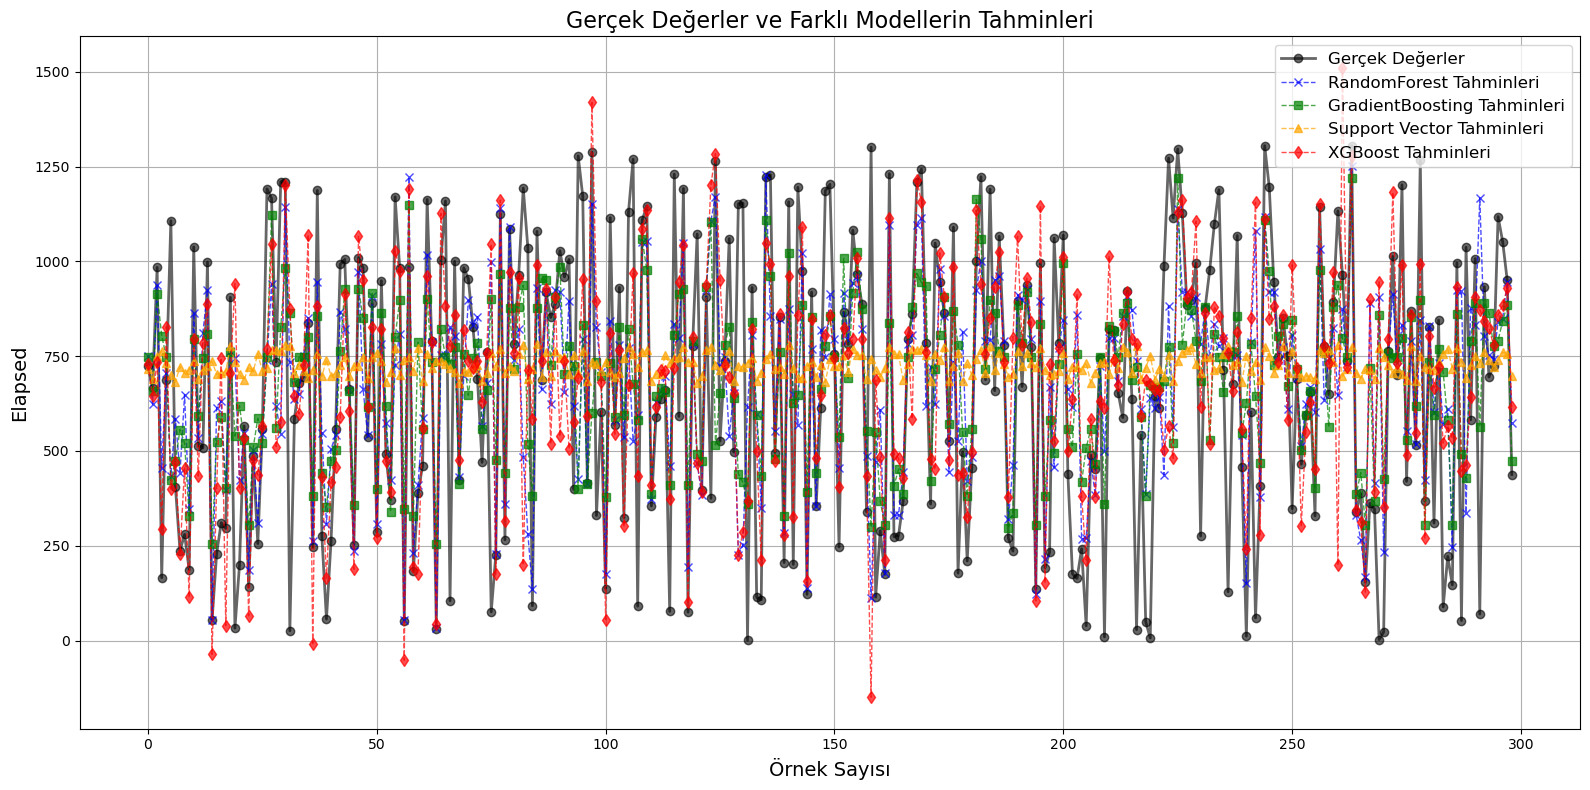

In [27]:
import matplotlib.pyplot as plt

# Daha büyük bir figür boyutu
plt.figure(figsize=(16, 8))

# Gerçek y_test değerlerini çizme
plt.plot(y_test, label='Gerçek Değerler', color='black', alpha=0.6, linewidth=2, marker='o')

# Farklı modellerin tahminlerini çizme
plt.plot(y_pred, label='RandomForest Tahminleri', linestyle='--', color='blue', alpha=0.7, linewidth=1, marker='x')
plt.plot(y_pred_gb, label='GradientBoosting Tahminleri', linestyle='--', color='green', alpha=0.7, linewidth=1, marker='s')
plt.plot(y_pred_svr, label='Support Vector Tahminleri', linestyle='--', color='orange', alpha=0.7, linewidth=1, marker='^')
plt.plot(y_pred_xgb, label='XGBoost Tahminleri', linestyle='--', color='red', alpha=0.7, linewidth=1, marker='d')

# Grafik detayları
plt.legend(loc='upper right', fontsize=12)
plt.title('Gerçek Değerler ve Farklı Modellerin Tahminleri', fontsize=16)
plt.xlabel('Örnek Sayısı', fontsize=14)
plt.ylabel('Elapsed', fontsize=14)
plt.grid(True)  # Izgara ekleyerek okunabilirliği artırır
plt.tight_layout()  # Grafik öğeleri arasında daha iyi bir yerleşim sağlar
plt.show()


In [28]:
"""

### Metrikler
1. **MSE (Mean Squared Error)**: Gerçek değerler ile tahminler arasındaki hata karelerinin ortalamasını verir. MSE ne kadar küçükse model o kadar iyidir.
  
2. **RMSE (Root Mean Squared Error)**: MSE'nin kareköküdür ve hata birimlerini orijinal veri birimleri ile aynı hale getirir. Daha düşük değerler, daha iyi performans gösteren bir model anlamına gelir.

3. **MAE (Mean Absolute Error)**: Gerçek değerler ile tahminler arasındaki mutlak hataların ortalamasıdır. Yine, daha düşük bir MAE daha iyi bir modeli ifade eder.

4. **R² (R-kare)**: Modelin bağımsız değişkenlerin, bağımlı değişkenin (hedef değişkenin) varyansını ne kadar açıkladığını gösterir. 1'e ne kadar yakınsa model o kadar iyidir, 0 ise modelin hiçbir açıklayıcı gücü olmadığını gösterir.

### Modellerin Yorumlanması
1. **RandomForestRegressor**:
   - **MSE**: 95082.46
   - **RMSE**: 308.35
   - **MAE**: 204.75
   - **R²**: 0.3427
   - **Yorum**: Orta düzeyde bir performans sergiliyor. RMSE ve MAE değerleri, tahminlerin ne kadar doğru olduğunu gösteriyor.

2. **GradientBoostingRegressor**:
   - **MSE**: 84824.41 (en düşük MSE)
   - **RMSE**: 291.25 (en düşük RMSE)
   - **MAE**: 212.94
   - **R²**: 0.4136 (en yüksek R²)
   - **Yorum**: En iyi performansa sahip modeldir. Tüm metriklerde en iyi değerlere sahiptir, bu da modelin veriyi daha iyi açıkladığını gösterir.

3. **Support Vector Regressor**:
   - **MSE**: 141994.74 (en yüksek MSE)
   - **RMSE**: 376.82 (en yüksek RMSE)
   - **MAE**: 320.29 (en yüksek MAE)
   - **R²**: 0.0183 (en düşük R²)
   - **Yorum**: Diğer modellere göre en kötü performansı sergiliyor. Yüksek hata değerleri, modelin tahminlerinin gerçek değerlere oldukça uzak olduğunu gösteriyor.

4. **XGBoost**:
   - **MSE**: 98111.72
   - **RMSE**: 313.23
   - **MAE**: 206.29
   - **R²**: 0.3217
   - **Yorum**: Gradient Boosting modeline kıyasla daha düşük bir performans sergiliyor. RMSE ve MAE değerleri, RandomForest modeline oldukça yakın.

### Genel Değerlendirme
- **En iyi model**: GradientBoostingRegressor, tüm metriklerde en iyi performansı gösteriyor ve model seçimi için önerilir.
- **Kötü model**: Support Vector Regressor, diğer modellere göre oldukça kötü sonuçlar veriyor.
- **Hedefler**: Eğer tahmin doğruluğu önemliyse, Gradient Boosting veya Random Forest modelleri kullanılabilir. Yine de, model seçimi, projenin ihtiyaçlarına ve tahmin doğruluğu beklentilerine göre yapılmalıdır.


"""

"\n\n### Metrikler\n1. **MSE (Mean Squared Error)**: Gerçek değerler ile tahminler arasındaki hata karelerinin ortalamasını verir. MSE ne kadar küçükse model o kadar iyidir.\n  \n2. **RMSE (Root Mean Squared Error)**: MSE'nin kareköküdür ve hata birimlerini orijinal veri birimleri ile aynı hale getirir. Daha düşük değerler, daha iyi performans gösteren bir model anlamına gelir.\n\n3. **MAE (Mean Absolute Error)**: Gerçek değerler ile tahminler arasındaki mutlak hataların ortalamasıdır. Yine, daha düşük bir MAE daha iyi bir modeli ifade eder.\n\n4. **R² (R-kare)**: Modelin bağımsız değişkenlerin, bağımlı değişkenin (hedef değişkenin) varyansını ne kadar açıkladığını gösterir. 1'e ne kadar yakınsa model o kadar iyidir, 0 ise modelin hiçbir açıklayıcı gücü olmadığını gösterir.\n\n### Modellerin Yorumlanması\n1. **RandomForestRegressor**:\n   - **MSE**: 95082.46\n   - **RMSE**: 308.35\n   - **MAE**: 204.75\n   - **R²**: 0.3427\n   - **Yorum**: Orta düzeyde bir performans sergiliyor. RMSE v